# Exploratory Data Analysis

#### We are working with the data with null values in TVL, close price and market cap because we want to see since when there's registration and how it has evolved from 24-09-2023 to 21-09-2024

## Libraries

In [400]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from utils import plot_token_data

## Loading data

In [339]:
# Function to load JSON
def loadJSON(filepath):
    with open(filepath) as file:
        return json.load(file)

In [340]:
# Loading the dataframe from json
df = pd.DataFrame(loadJSON('../../data/json/tokens-final.json'))
print(df.shape)

df.head()

(76804, 8)


Date Token     Name           TVL    Market cap     Price  \
0  24-09-2023   BTC  Bitcoin  1.610619e+08  5.179683e+11  26261.44   
1  25-09-2023   BTC  Bitcoin  1.546845e+08  5.117877e+11  26297.93   
2  26-09-2023   BTC  Bitcoin  1.536478e+08  5.121034e+11  26212.59   
3  27-09-2023   BTC  Bitcoin  1.481046e+08  5.110543e+11  26360.20   
4  28-09-2023   BTC  Bitcoin  1.478454e+08  5.137136e+11  27027.20   

   Correlation  Class  
0            0      4  
1            0      4  
2            0      4  
3            0      4  
4            0      4

In [341]:
# Showing basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76804 entries, 0 to 76803
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         76804 non-null  object 
 1   Token        76804 non-null  object 
 2   Name         76804 non-null  object 
 3   TVL          76804 non-null  float64
 4   Market cap   76804 non-null  float64
 5   Price        76804 non-null  float64
 6   Correlation  76804 non-null  int64  
 7   Class        76804 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.7+ MB


In [342]:
# Basic stats
df.describe()

TVL    Market cap         Price   Correlation         Class
count  7.680400e+04  7.680400e+04  76804.000000  76804.000000  76804.000000
mean   3.164849e+08  7.770196e+09    458.132160      0.253489      3.663507
std    3.200450e+09  7.778576e+10   4675.565809      0.435011      0.976287
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000
25%    1.532105e+05  5.987073e+06      0.003248      0.000000      4.000000
50%    2.331298e+06  6.613152e+07      0.101600      0.000000      4.000000
75%    2.088240e+07  5.725546e+08      0.836700      1.000000      4.000000
max    6.797230e+10  1.436631e+12  73118.090000      1.000000      4.000000

## Basic graphs to understand the data

### Tokens with the highest average market cap

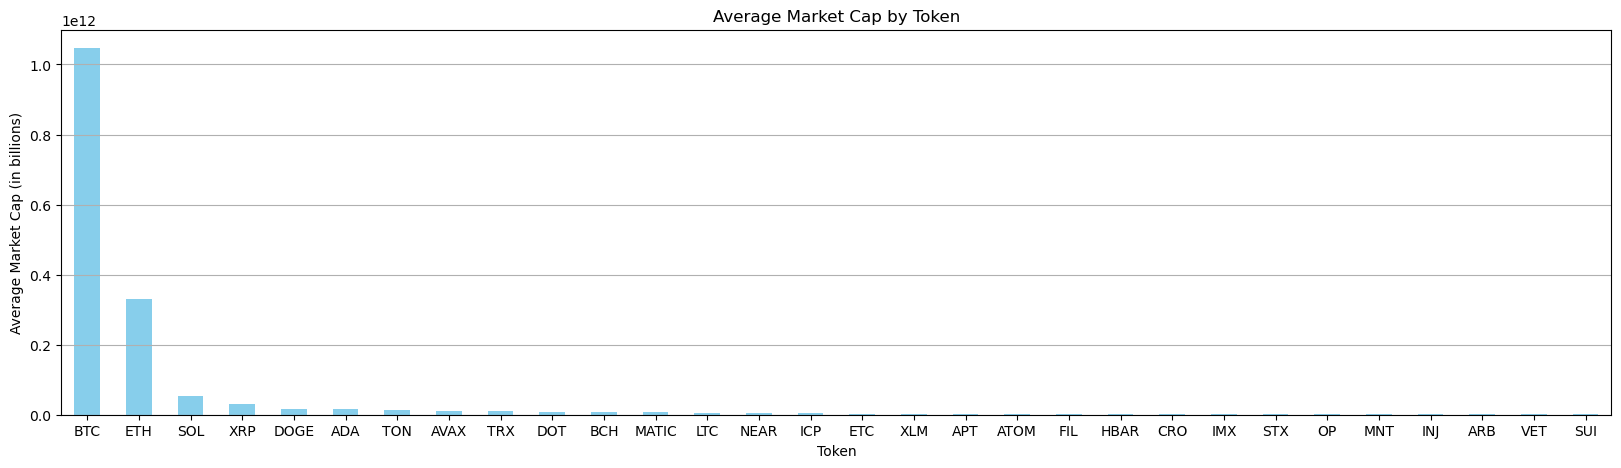

In [343]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_desc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_desc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap (in billions)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

## Tokens with the lowest average market cap

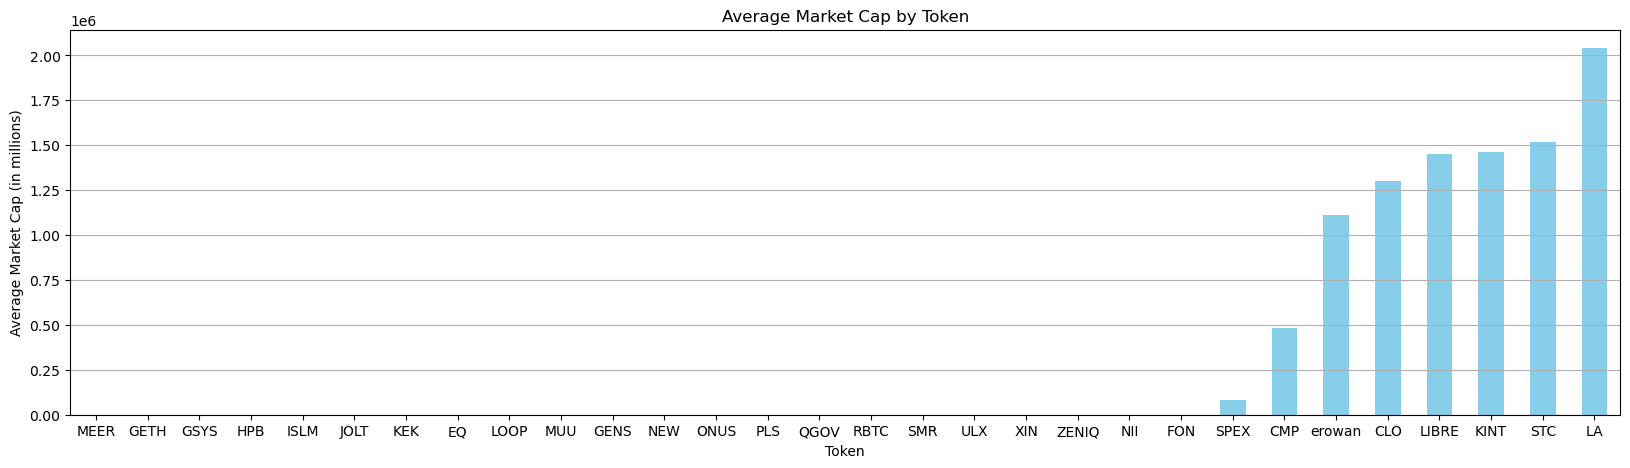

In [344]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_asc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap (in millions)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

#### We can see that there are some tokens with average market cap in zero, we can get rid of them :)

In [345]:
# Calculate the average market cap for each token
average_market_cap = df.groupby('Token')['Market cap'].mean().reset_index()

# Identify tokens with an average market cap of 0
tokens_with_zero_market_cap = average_market_cap[average_market_cap['Market cap'] == 0]['Token']

# Filter out rows corresponding to those tokens
df = df[~df['Token'].isin(tokens_with_zero_market_cap)]

# Display the filtered DataFrame
print(df.shape)
df.head()

(68796, 8)


Date Token     Name           TVL    Market cap     Price  \
0  24-09-2023   BTC  Bitcoin  1.610619e+08  5.179683e+11  26261.44   
1  25-09-2023   BTC  Bitcoin  1.546845e+08  5.117877e+11  26297.93   
2  26-09-2023   BTC  Bitcoin  1.536478e+08  5.121034e+11  26212.59   
3  27-09-2023   BTC  Bitcoin  1.481046e+08  5.110543e+11  26360.20   
4  28-09-2023   BTC  Bitcoin  1.478454e+08  5.137136e+11  27027.20   

   Correlation  Class  
0            0      4  
1            0      4  
2            0      4  
3            0      4  
4            0      4

#### We can display again!

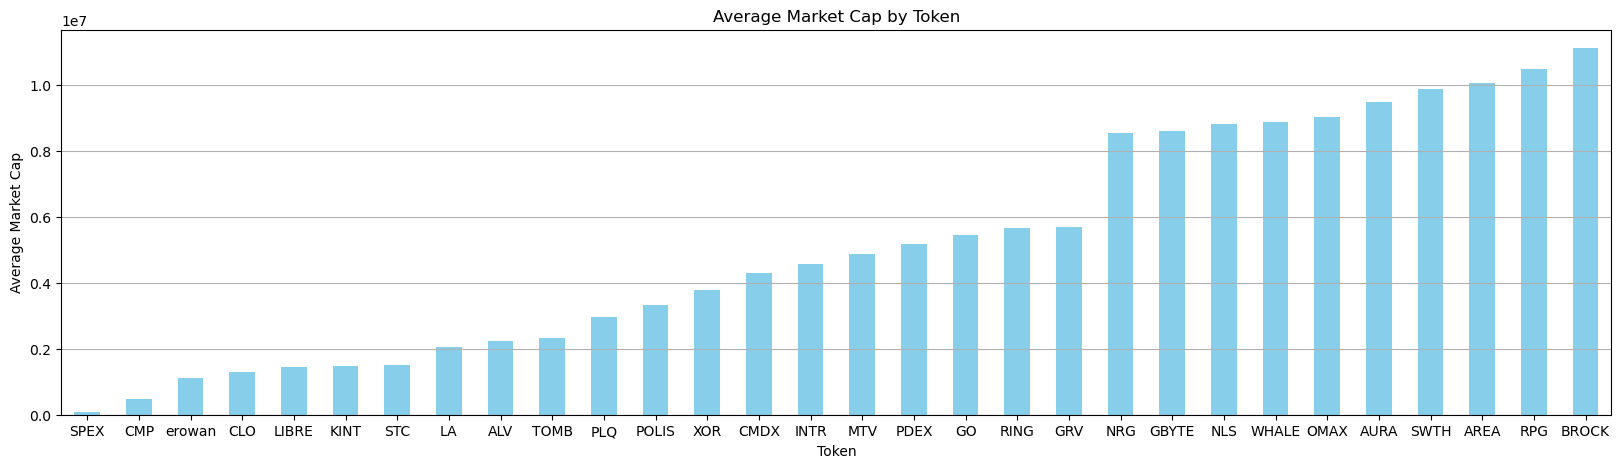

In [346]:
# Group by 'Token' and calculate average 'Market cap'
average_market_cap_asc = df.groupby('Token')['Market cap'].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:30].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

#### We can identify SPEX as the token with the lowest average market cap, but we can identify some other tokens that have a low value...

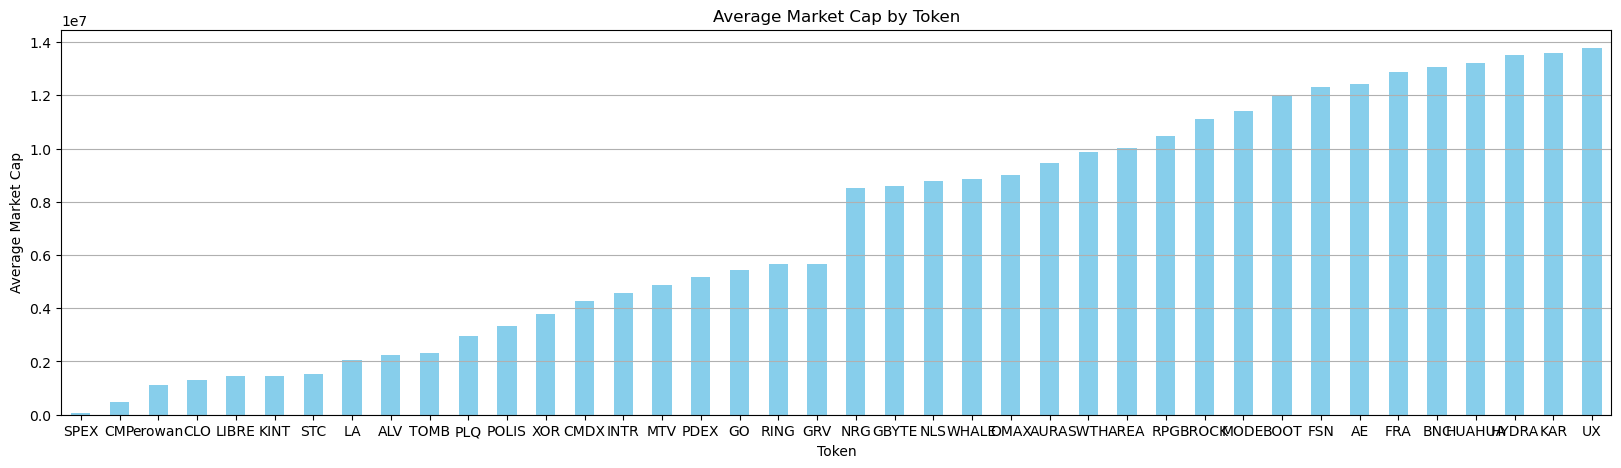

In [347]:
# Plotting
plt.figure(figsize=(20, 5))
average_market_cap_asc[:40].plot(kind='bar', color='skyblue')
plt.title('Average Market Cap by Token')
plt.xlabel('Token')
plt.ylabel('Average Market Cap')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show plot
plt.show()

# Top 5 Tokens with Lowest Average Market Cap

In [348]:
# Convert the column 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Order the DataFrame by date
df = df.sort_values('Date')

In [349]:
# Definir la fecha para la línea vertical
vertical_line_date = pd.to_datetime('2024-04-20')

In [350]:
# Calculate the average Market Cap per Token
top5_low_market_cap_tokens = average_market_cap_asc.head(5).index.tolist()
print("Top 5 Tokens por Market Cap Promedio:", top5_low_market_cap_tokens)

Top 5 Tokens por Market Cap Promedio: ['SPEX', 'CMP', 'erowan', 'CLO', 'LIBRE']


In [351]:
# Filter the DataFrame to include only the top 5 tokens
df_top5_low_market_cap = df[df['Token'].isin(top5_low_market_cap_tokens)]

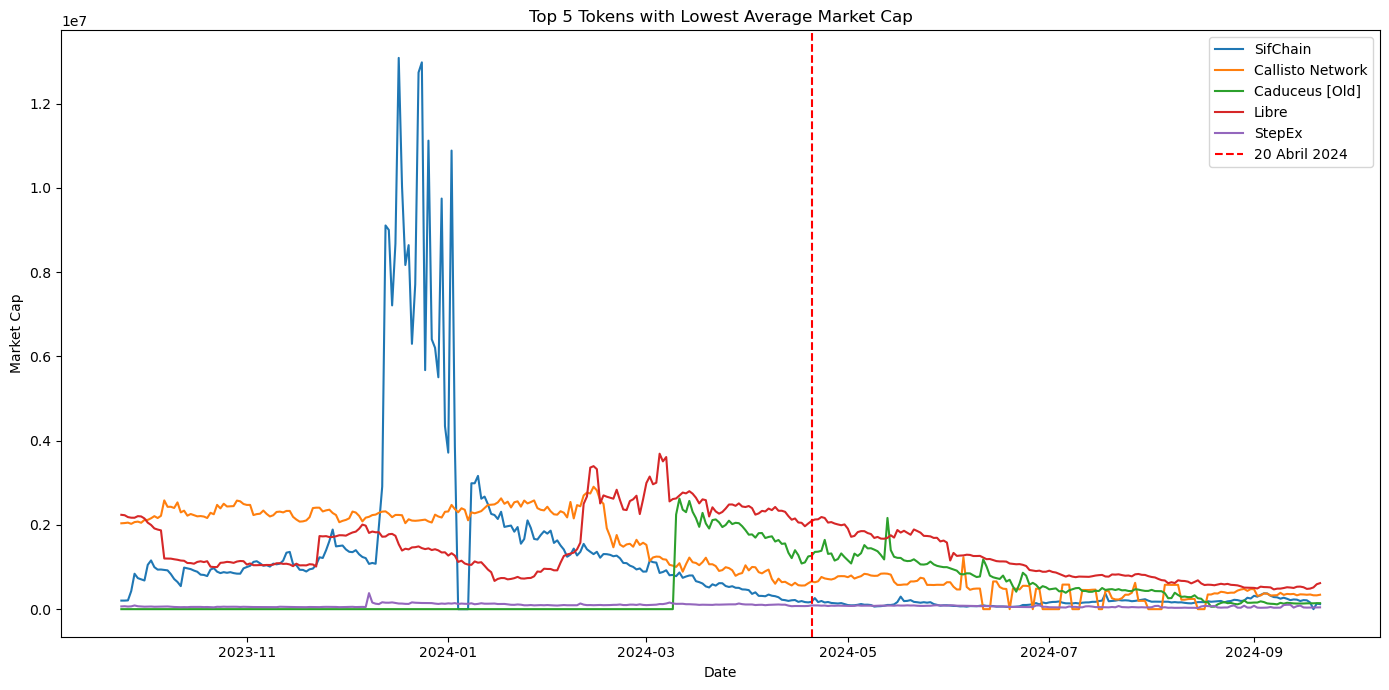

In [352]:
# Create Market Cap Time Series chart for Top 5 Tokens
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top5_low_market_cap, x='Date', y='Market cap', hue='Name')

# Add vertical dotted line
plt.axvline(x=vertical_line_date, linestyle='--', color='red')

# Configure titles and labels
plt.title('Top 5 Tokens with Lowest Average Market Cap')
plt.xlabel('Date')
plt.ylabel('Market Cap')

# Adjust the legend to include the vertical line
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='red', linestyle='--'))
labels.append('20 Abril 2024')
plt.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()

# Top 5 Tokens with Highest Average Market Cap

In [353]:
# Calcular el Market Cap promedio por Token
top5_high_market_cap_tokens = average_market_cap_asc.tail(5).index.tolist()
print("Top 5 Tokens por Market Cap Promedio:", top5_high_market_cap_tokens)

Top 5 Tokens por Market Cap Promedio: ['DOGE', 'XRP', 'SOL', 'ETH', 'BTC']


In [354]:
# Filter the DataFrame to include only the top 5 tokens
df_top5_high_market_cap = df[df['Token'].isin(top5_high_market_cap_tokens)]

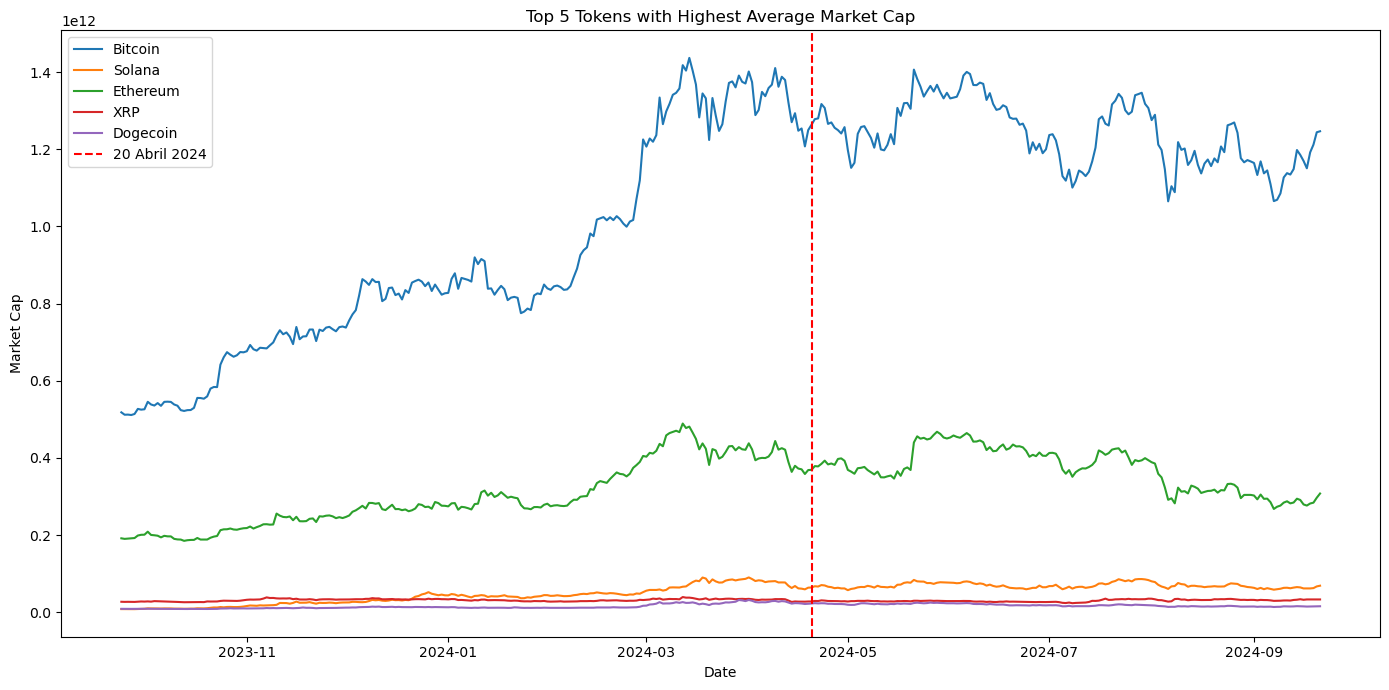

In [355]:
# Create Market Cap Time Series chart for Top 5 Tokens
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top5_high_market_cap, x='Date', y='Market cap', hue='Name')

# Add vertical dotted line
plt.axvline(x=vertical_line_date, linestyle='--', color='red')

# Configure titles and labels
plt.title('Top 5 Tokens with Highest Average Market Cap')
plt.xlabel('Date')
plt.ylabel('Market Cap')

# Adjust the legend to include the vertical line
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='red', linestyle='--'))
labels.append('20 Abril 2024')
plt.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()

# Top 5 Tokens with Lowest Average Price

In [356]:
# Calculate the average price per token in ascending order
average_price_asc = df.groupby('Token')['Price'].mean().sort_values(ascending=True)

In [357]:
# Select the 5 tokens with the lowest average Price
top5_low_price_tokens = average_price_asc.head(5).index.tolist()
print("Top 5 Tokens por Price Promedio Más Bajo:", top5_low_price_tokens)

Top 5 Tokens por Price Promedio Más Bajo: ['BOOT', 'BRISE', 'BTT', 'HUAHUA', 'LUNC']


In [358]:
# Filter the DataFrame to include only the top 5 tokens
df_top5_low_price = df[df['Token'].isin(top5_low_price_tokens)]

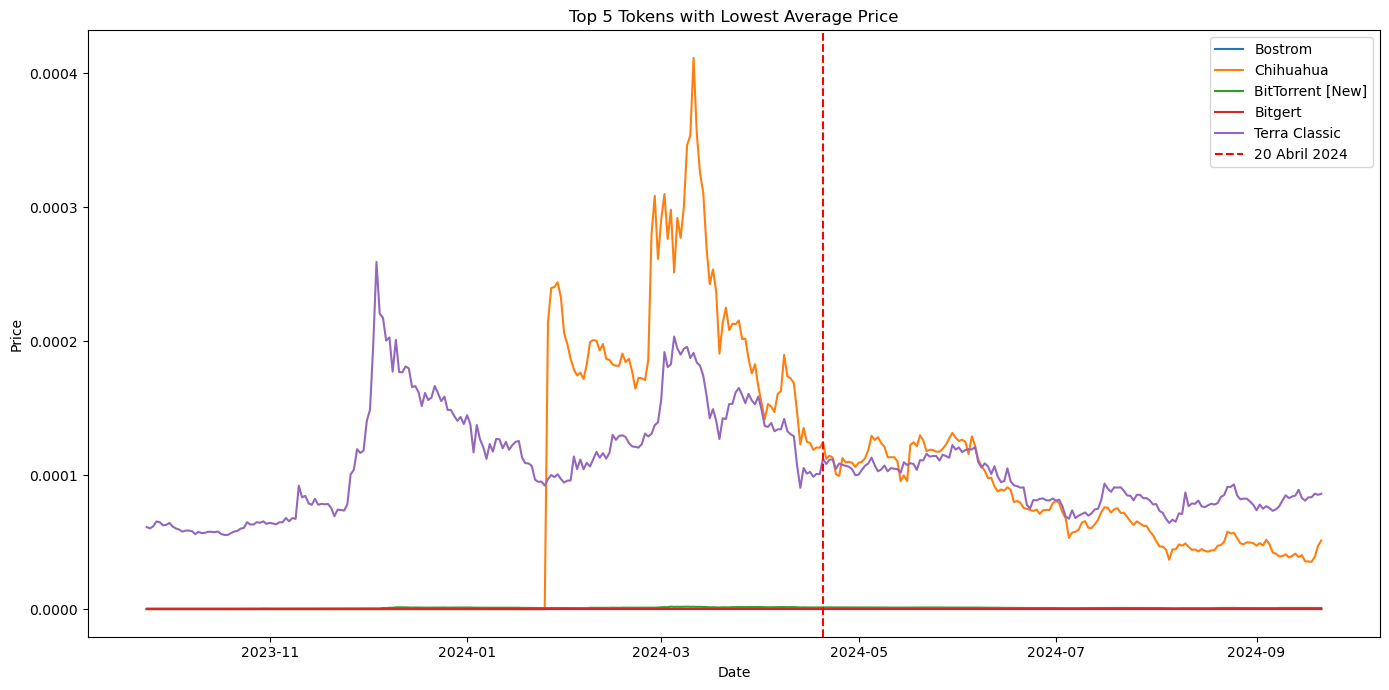

In [359]:
# Create the Price Time Series chart for the Top 5 Tokens
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top5_low_price, x='Date', y='Price', hue='Name')

# Add vertical dotted line
plt.axvline(x=vertical_line_date, linestyle='--', color='red')

# Configure titles and labels
plt.title('Top 5 Tokens with Lowest Average Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Adjust the legend to include the vertical line
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='red', linestyle='--'))
labels.append('20 Abril 2024')
plt.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()

# Top 5 Tokens with Highest Average Price

In [360]:
# Select the 5 tokens with the lowest average Price
top5_high_price_tokens = average_price_asc.tail(5).index.tolist()
print("Top 5 Tokens por Price Promedio Más Bajo:", top5_high_price_tokens)

Top 5 Tokens por Price Promedio Más Bajo: ['SOL', 'GNO', 'BCH', 'ETH', 'BTC']


In [361]:
# Filter the DataFrame to include only the top 5 tokens
df_top5_high_price = df[df['Token'].isin(top5_high_price_tokens)]

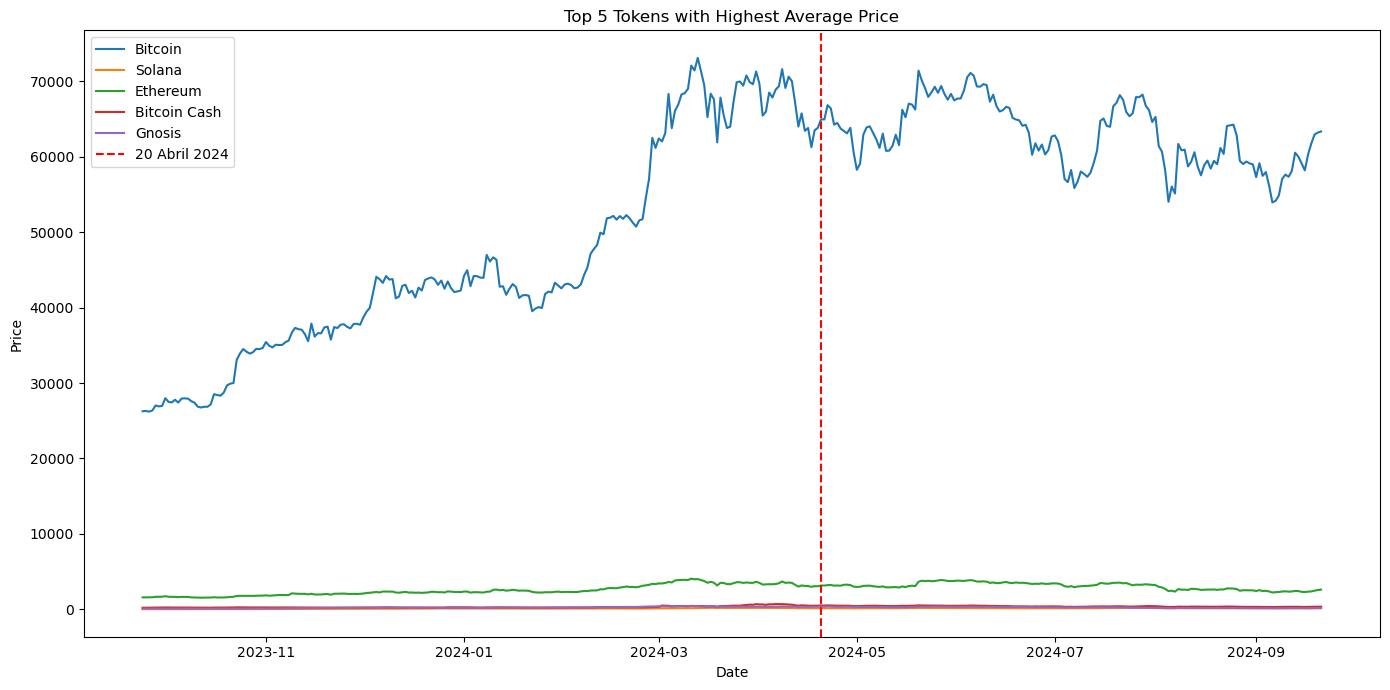

In [362]:
# Create the Price Time Series chart for the Top 5 Tokens
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top5_high_price, x='Date', y='Price', hue='Name')

# Add vertical dotted line
plt.axvline(x=vertical_line_date, linestyle='--', color='red')

# Configure titles and labels
plt.title('Top 5 Tokens with Highest Average Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Adjust the legend to include the vertical line
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='red', linestyle='--'))
labels.append('20 Abril 2024')
plt.legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()

# Correlation Heat Map for Bitcoin

In [404]:
name_token = 'MicroVisionChain'

# Filter the DataFrame to include only the records of the selected token
df_filtered = df[df['Name'] == name_token]

In [405]:
# Select numerical columns for correlation
numeric_columns = ['TVL', 'Market cap', 'Price', 'Correlation']

In [406]:
# Delete rows with null values in selected columns
df_numeric = df_filtered[numeric_columns].dropna()

In [407]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()
print(f"correlation matrix for {name_token}:")
print(corr_matrix)

correlation matrix for MicroVisionChain:
                  TVL  Market cap     Price  Correlation
TVL          1.000000    0.903976  0.819105    -0.159773
Market cap   0.903976    1.000000  0.980161    -0.105262
Price        0.819105    0.980161  1.000000    -0.129840
Correlation -0.159773   -0.105262 -0.129840     1.000000


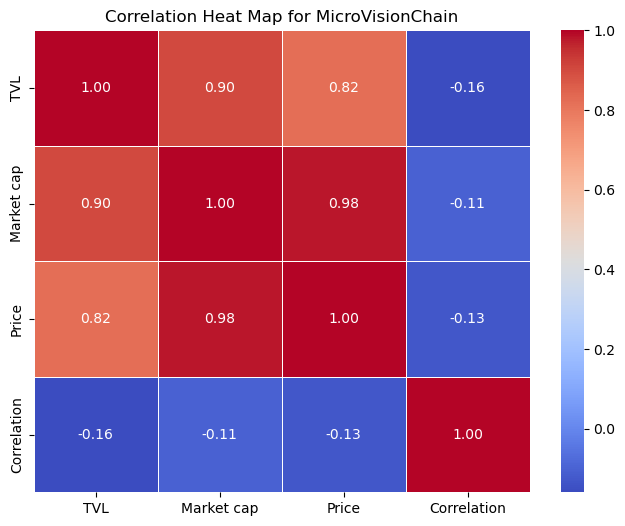

In [408]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heat Map for {name_token}')
plt.show()

# Evolution of LTV, Market Cap and Price for X token

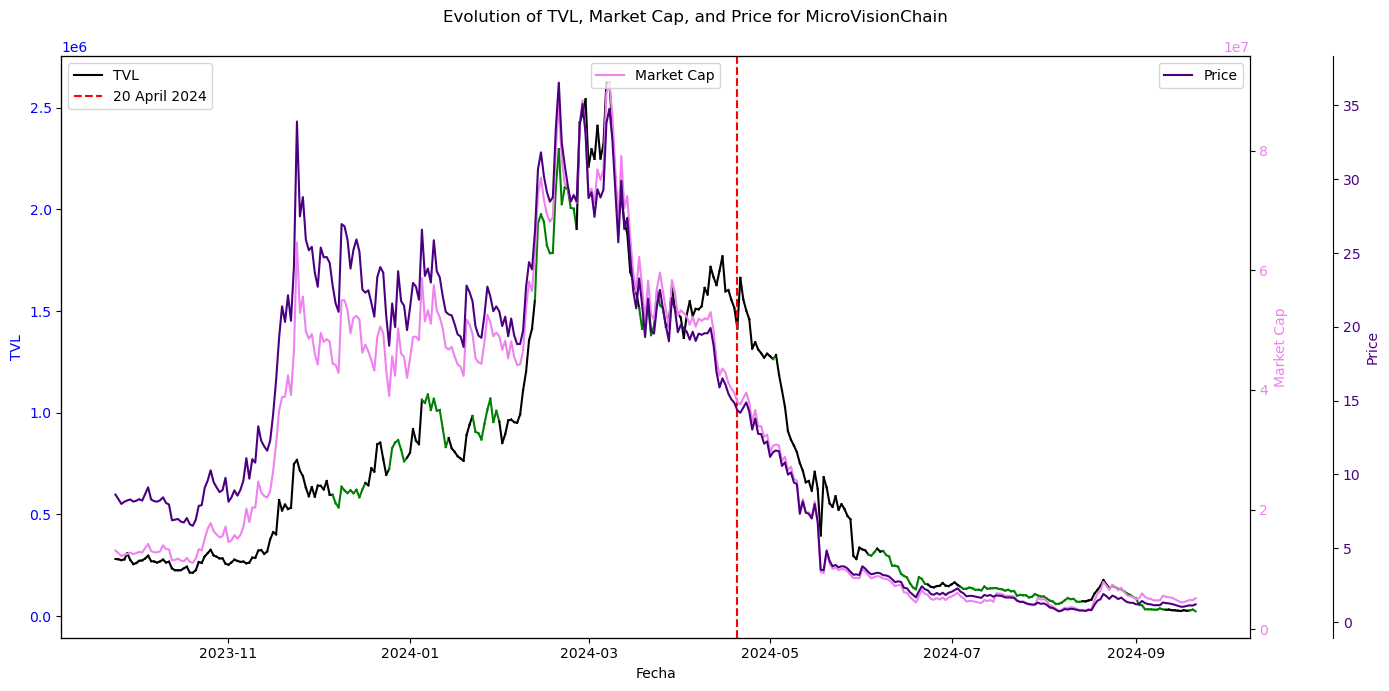

In [401]:
plot_token_data(df, 'MicroVisionChain', pd.to_datetime('2024-04-20'))

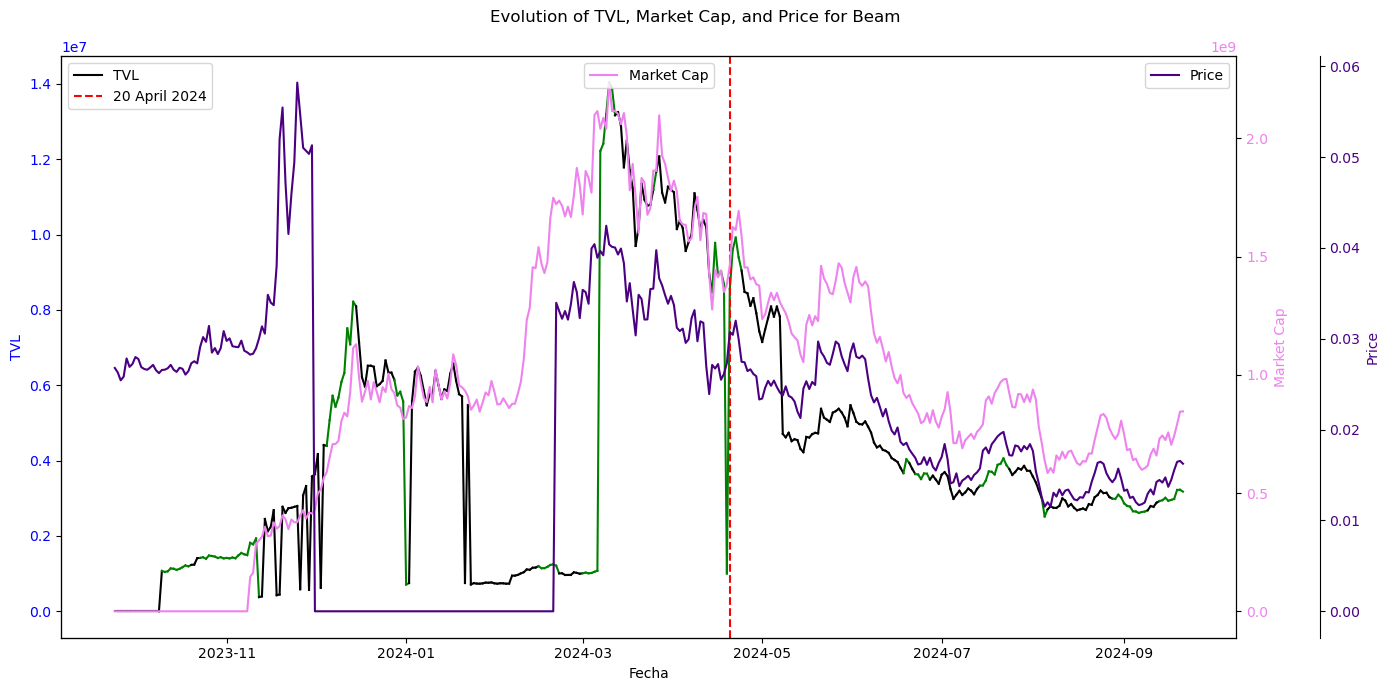

In [402]:
plot_token_data(df, 'Beam', pd.to_datetime('2024-04-20'))

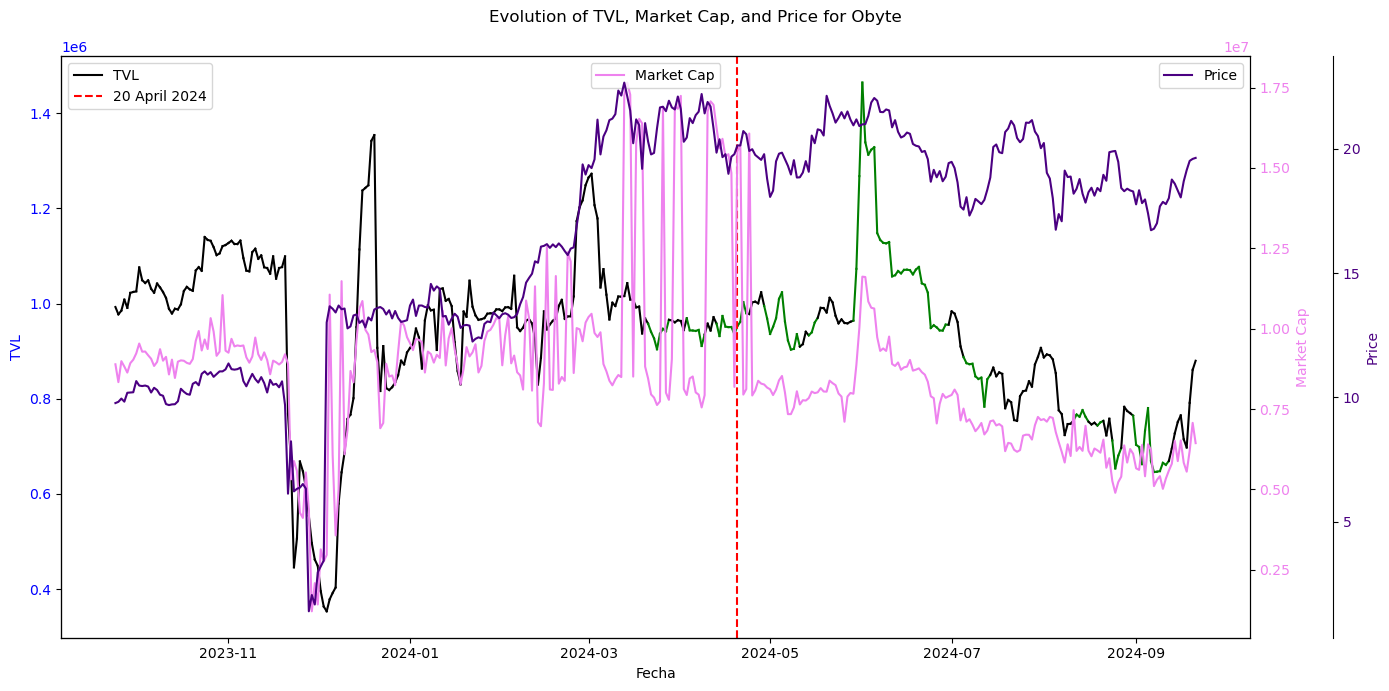

In [403]:
plot_token_data(df, 'Obyte', pd.to_datetime('2024-04-20'))

# Market Cap Token Leak by Market Cap on September 21, 2024

In [372]:
# Define the specific date: September 21, 2024
specific_date = pd.to_datetime('2024-09-21')
df_specific_date = df[df['Date'] == specific_date]

# Select relevant columns
df_market_cap = df_specific_date[['Name', 'Market cap']]
    
# Order from lowest to highest Market Cap
df_market_cap_sorted = df_market_cap.sort_values(by='Market cap', ascending=True)
    
# Reset the index to facilitate the display
df_market_cap_sorted = df_market_cap_sorted.reset_index(drop=True)
    
# Statistical description of the new DataFrame
describe_market_cap = df_market_cap_sorted.describe()
print(f"\nDescripción Estadística del Market Cap el {specific_date.strftime('%Y-%m-%d')}:")
print(describe_market_cap)


Descripción Estadística del Market Cap el 2024-09-21:
         Market cap
count  1.890000e+02
mean   9.623774e+09
std    9.333551e+10
min    0.000000e+00
25%    1.140357e+07
50%    9.526829e+07
75%    6.922711e+08
max    1.246476e+12


markep cap de menor capitalizacion del 21 de septiembre 2024 en base a los tokens y ordenar de menor a mayor
Hacer un describe al nuevo datafram

# Average LTV, Market cap and Price per Token Class

In [373]:
# Calculate class averages
average_by_class = df.groupby('Class')[['TVL', 'Market cap', 'Price']].mean().reset_index()

C:\Users\andre\AppData\Local\Temp\ipykernel_21524\2298907453.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




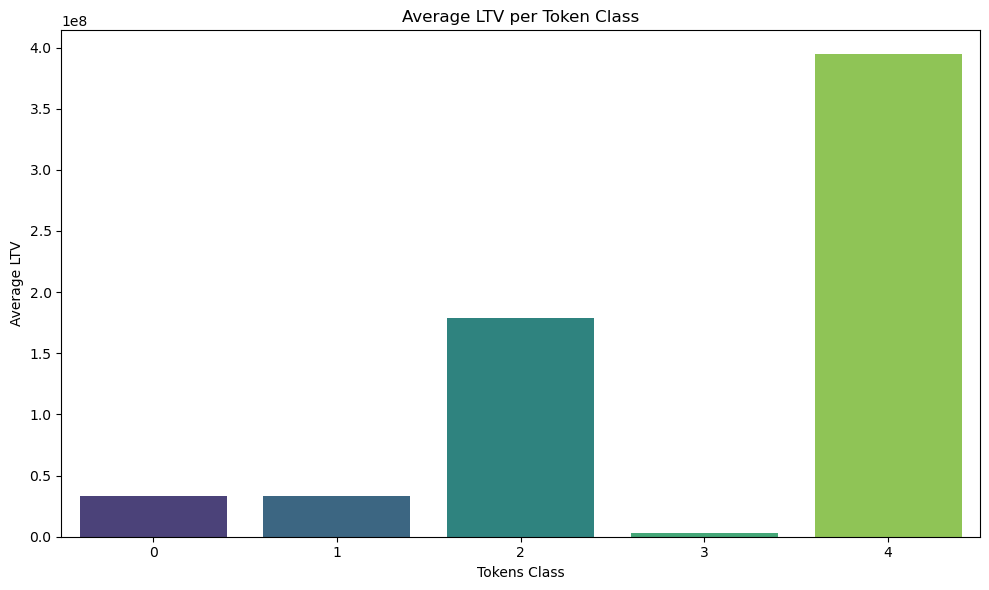

In [374]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_by_class, x='Class', y='TVL', palette='viridis')
plt.title('Average LTV per Token Class')
plt.xlabel('Tokens Class')
plt.ylabel('Average LTV')
plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_21524\3593715395.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




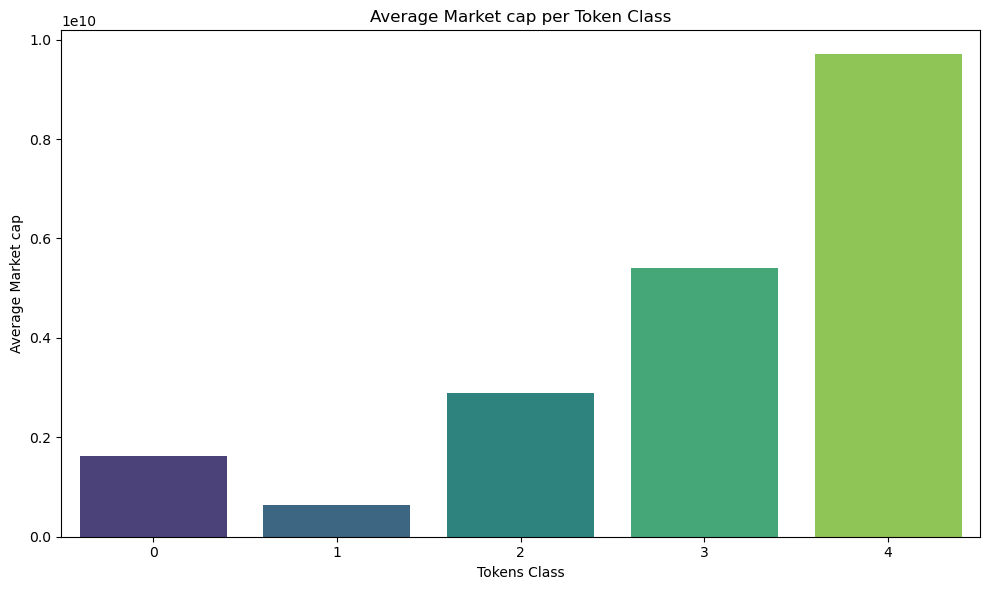

In [375]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_by_class, x='Class', y='Market cap', palette='viridis')
plt.title('Average Market cap per Token Class')
plt.xlabel('Tokens Class')
plt.ylabel('Average Market cap')
plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_21524\355611109.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




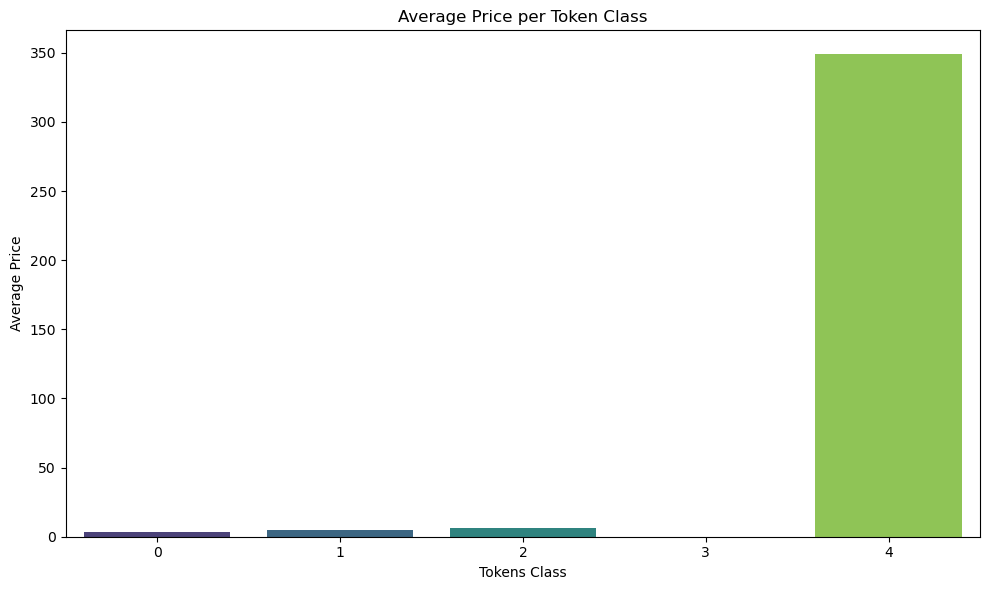

In [376]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_by_class, x='Class', y='Price', palette='viridis')
plt.title('Average Price per Token Class')
plt.xlabel('Tokens Class')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# Contribution of LTV, Market Cap and Price to the Health of X Token

In [377]:
selected_token = 'Solana'

df_dot = df[df['Name'] == selected_token]

In [378]:
# Create a DataFrame with TVL, Market Cap and Price columns.
df_area = df_dot[['Date', 'TVL', 'Market cap', 'Price']].dropna()

In [379]:
# Scaling the data 
scaler = MinMaxScaler()
df_area_scaled = df_area.copy()
df_area_scaled[['TVL', 'Market cap', 'Price']] = scaler.fit_transform(df_area_scaled[['TVL', 'Market cap', 'Price']])

In [380]:
# Set Date column as index
df_area_scaled.set_index('Date', inplace=True)

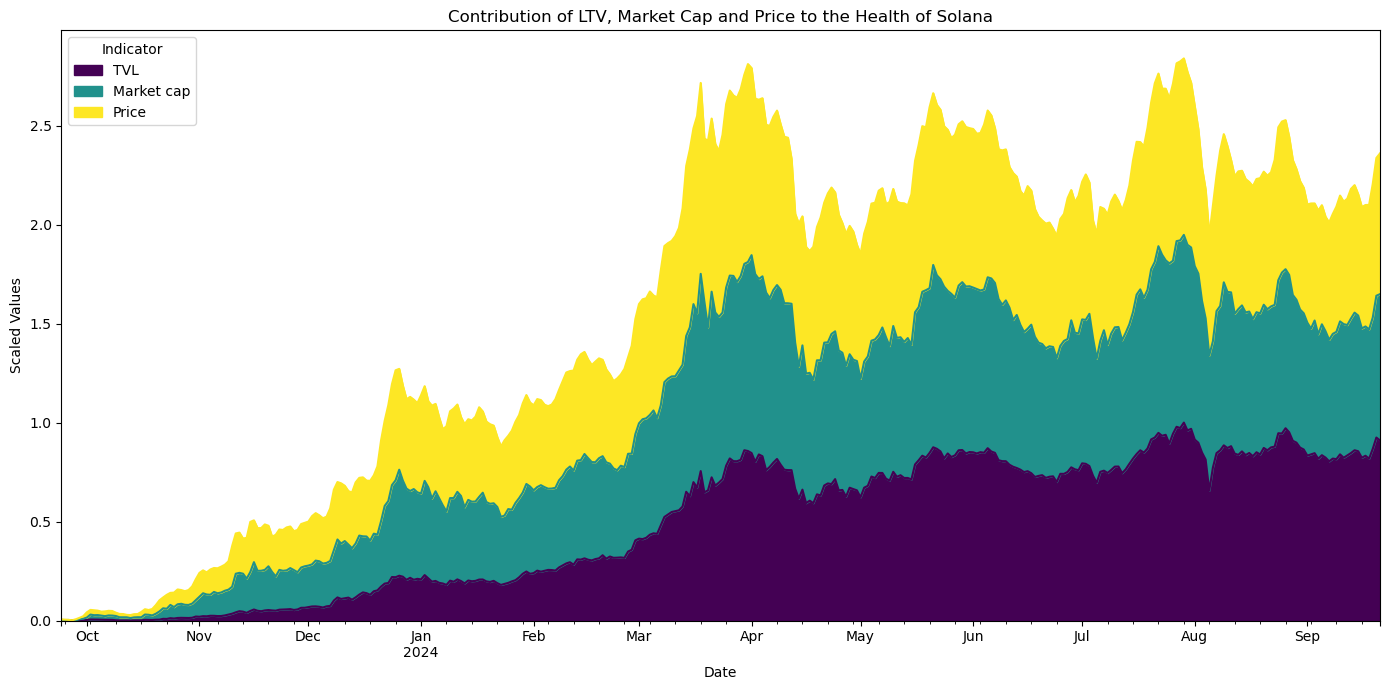

In [381]:
df_area_scaled.plot.area(figsize=(14, 7), cmap='viridis')
plt.title(f'Contribution of LTV, Market Cap and Price to the Health of {selected_token}')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

In [382]:
# Calculate the historical average of the market cap per token
average_market_cap = df.groupby('Token')['Market cap'].mean().reset_index()

# Calculate the 25% quartile of the average market cap
cuartil_25_market_cap = average_market_cap['Market cap'].quantile(0.25)

# Filter cryptocurrencies whose average market cap is below the quartile 25%.
low_market_cap_tokens = average_market_cap[average_market_cap['Market cap'] < cuartil_25_market_cap]['Token']

# Filter the original DataFrame to keep only the filtered tokens
filtered_df = df[df['Token'].isin(low_market_cap_tokens)]

# Stacked Bar Plot

In [384]:
# Group by token and sum metrics
grouped_data = filtered_df.groupby('Token').agg({'TVL': 'sum', 'Market cap': 'sum', 'Price': 'sum'}).reset_index()

# Create stacked bar charts for TVL and Market Cap
fig = px.bar(grouped_data, x='Token', y=['TVL', 'Market cap'], title="Stacked Bar Plot: TVL and Market Cap per Token (Average Market Cap < Q25)")
fig.show()

# Heatmap

In [385]:
# Create a pivot table for price correlation between tokens
price_pivot = filtered_df.pivot_table(index='Date', columns='Token', values='Price')

# Calculate the correlation matrix
price_corr = price_pivot.corr()

# Create a heatmap
fig = px.imshow(price_corr, title="Price Correlation between Tokens (Average Market Cap < Q25)")
fig.show()

# Scatter Matrix/Pair Plot

In [386]:
# Select relevant columns for analysis
subset = filtered_df[['Price', 'Market cap', 'TVL']]

# Create scattering matrix
fig = px.scatter_matrix(subset, title="Scatter Matrix of Price, Market Cap, and TVL (Average Market Cap < Q25)")
fig.show()

# Line Plot by Category

In [387]:
# Group by date and calculate the average of the metrics
average_data = filtered_df.groupby('Date').agg({'Price': 'mean', 'TVL': 'mean', 'Market cap': 'mean'}).reset_index()

# Line chart for average price
fig = go.Figure()
fig.add_trace(go.Scatter(x=average_data['Date'], y=average_data['Price'], mode='lines', name='Average Price'))
fig.update_layout(title="Average Price Over Time (Average Market Cap < Q25)", xaxis_title="Date", yaxis_title="Price (USD)")
fig.show()

# Line graph for average TVL
fig = go.Figure()
fig.add_trace(go.Scatter(x=average_data['Date'], y=average_data['TVL'], mode='lines', name='Average TVL'))
fig.update_layout(title="Average TVL Over Time (Average Market Cap < Q25)", xaxis_title="Date", yaxis_title="TVL (USD)")
fig.show()

# Line chart for average Market Cap
fig = go.Figure()
fig.add_trace(go.Scatter(x=average_data['Date'], y=average_data['Market cap'], mode='lines', name='Average Market Cap'))
fig.update_layout(title="Average Market Cap Over Time (Average Market Cap < Q25)", xaxis_title="Date", yaxis_title="Market Cap (USD)")
fig.show()

# Histogram Plot

In [388]:
# Create a histogram of price distribution
fig = px.histogram(filtered_df, x='Price', title="Histogram of Token Prices (Average Market Cap < Q25)", nbins=50)
fig.show()

# Create a histogram of the Market Cap distribution
fig = px.histogram(filtered_df, x='Market cap', title="Histogram of Market Cap (Average Market Cap < Q25)", nbins=50)
fig.show()

# Create a histogram of the TVL distribution
fig = px.histogram(filtered_df, x='TVL', title="Histogram of TVL (Average Market Cap < Q25)", nbins=50)
fig.show()

# Get tokens of actual date with low market cap

In [390]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
filtered_df = df[df['Date'] >= '2024-09-21']
cuartil_20_market_cap = filtered_df['Market cap'].quantile(0.20)
low_market_cap_tokens = filtered_df[filtered_df['Market cap'] < cuartil_20_market_cap]
print(f"Tokens filtrados por debajo del cuartil 20% del market cap: {len(low_market_cap_tokens)} tokens")
print(low_market_cap_tokens[['Token', 'Market cap']])

Tokens filtrados por debajo del cuartil 20% del market cap: 38 tokens
        Token    Market cap
42223     STC  4.477058e+05
40767    PDEX  1.262154e+06
30575    RING  3.090121e+06
30939     XOR  3.397526e+06
38219   HYDRA  6.943862e+06
39675  erowan  1.198474e+05
38947      SX  0.000000e+00
44771    TOMB  2.181505e+06
24023     FRA  3.837489e+06
68431   TENET  1.815526e+06
68067   SPACE  5.196480e+06
66975    AREA  5.774677e+06
8371       LA  1.350275e+06
66247     GRV  9.456279e+05
11647   POLIS  0.000000e+00
69887     ALV  1.931675e+06
74255     PLQ  1.110253e+06
73527     NLS  4.818265e+06
4367    GBYTE  6.439977e+06
71343   BROCK  5.228918e+06
70615   LIBRE  6.176169e+05
62243    SPEX  4.289044e+04
18199     NRG  5.578017e+06
54963  HUAHUA  5.123649e+06
54235      UX  4.489855e+06
53871   WHALE  2.270881e+06
20019     MTV  2.061223e+06
50595    CMDX  1.031403e+06
49139    OMAX  4.863836e+06
48775    KINT  1.112989e+06
13467     FSN  4.162326e+06
59331    INTR  1.817557e+06
14923 

# Bar graph

In [391]:
fig = px.bar(low_market_cap_tokens, x='Token', y='Market cap', title="Market Cap (Below 20th Percentile)")
fig.show()

# box plot

In [392]:
fig = px.box(low_market_cap_tokens, x='Token', y='TVL', title="TVL Distribution (Below 20th Percentile)")
fig.show()

# Test

In [393]:
# Make sure that the 'Date' column is in date format.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter cryptocurrencies with a market cap lower than 25% quartile
cuartil_25_market_cap = df['Market cap'].quantile(0.25)
low_market_cap_tokens = df[df['Market cap'] < cuartil_25_market_cap]

# Obtaining unique cryptocurrencies with low market cap
unique_tokens = low_market_cap_tokens['Token'].unique()

# Create charts for each crypto with low market cap
for token in unique_tokens[:8]:
    # Filter the data of each token
    token_data = low_market_cap_tokens[low_market_cap_tokens['Token'] == token]

    # Extract dates, TVL, Price and Market Cap
    dates = token_data['Date']
    tvl = token_data['TVL'].tolist()
    price = token_data['Price'].tolist()
    market_cap = token_data['Market cap'].tolist()
    correlation = token_data['Correlation'].tolist()

    # Create interactive graphic with Plotly
    fig = go.Figure()

    # Add TVL
    fig.add_trace(go.Scatter(x=dates, y=tvl, mode='lines', name=f'TVL (USD) - {token}', line=dict(color='green'), yaxis='y'))

    # Add Price
    fig.add_trace(go.Scatter(x=dates, y=price, mode='lines', name=f'Price (USD) - {token}', line=dict(color='blue'), yaxis='y2'))

    # Add Market Cap
    fig.add_trace(go.Scatter(x=dates, y=market_cap, mode='lines', name=f'Market Cap (USD) - {token}', line=dict(color='red'), yaxis='y3'))

    # Add Correlation (separate)
    fig.add_trace(go.Scatter(x=dates, y=correlation, mode='lines', name=f'Correlation - {token}', line=dict(color='purple'), yaxis='y4'))

    # Set the layout with four axes and no grid lines
    fig.update_layout(
        title=f"{token}: TVL, Price, Market Cap, and Correlation over Time",
        xaxis=dict(title="Date", showgrid=False),
        yaxis=dict(
            title="TVL (USD)",
            titlefont=dict(color="green"),
            tickfont=dict(color="green"),
            showgrid=False
        ),
        yaxis2=dict(
            title="Price (USD)",
            titlefont=dict(color="blue"),
            tickfont=dict(color="blue"),
            anchor="x",
            overlaying="y",
            side="right",
            showgrid=False
        ),
        yaxis3=dict(
            title="Market Cap (USD)",
            titlefont=dict(color="red"),
            tickfont=dict(color="red"),
            anchor="free",
            overlaying="y",
            side="right",
            position=1,
            showgrid=False
        ),
        yaxis4=dict(
            title="Correlation",
            titlefont=dict(color="purple"),
            tickfont=dict(color="purple"),
            anchor="x",
            overlaying="y",
            side="left",
            position=0,
            showgrid=False
        ),
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ),
        hovermode="x"
    )

    # Show interactive graphic
    fig.show()